<a href="https://colab.research.google.com/github/slowhandc1ap/KnnClassify/blob/main/KnnExerTanakorn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="yellow">Tanakorn Taweethawon 64060021621161

# Exercise 7.1
ให้นักศึกษาทดลองจำแนกข้อมูล diabetes.csv (โรคเบาหวาน) โดย download ข้อมูลจากเว็บไซต์ https://www.kaggle.com/saurabh00007/diabetescsv/version/1
โดยข้อกำหนดดังต่อไปนี้
1.  explore data เพื่อดูรายละเอียดของข้อมูล และ plot graph
2.  ทดลองจำแนกข้อมูลโดยใช้ค่า k ตั้งแต่ 1 3 5 7 9  เพื่อหาค่าที่มีประสิทธิภาพที่ดีที่สุด  แล้ว plot graphแสดงผล
3. นำโมเดลที่ได้จากค่า k ที่ดีที่สุดมาแสดงค่าประสิทธิภาพในรูปแบบของ Classification Report ที่แสดง precision recall f-measure
4. เปรียบเทียบประสิทธิ์ภาพการจำแนกข้อมูลกับอัลกอริทึม Decison Tree, Naive Bayes, KNN  แล้วพิจารณาหาอัลกอริทึมที่ดีที่สุดเพื่อสร้างโมเดล
4. นำโมเดลที่เลือกมาทดลองจำแนกกับชุดข้อมูลใหม่ (ให้หาเอง) ประมาณ 3 ตัวอย่าง แล้วแสดงผลการจำแนกให้ดู

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import os # use commandline
from google.colab import files
import io
uploaded = files.upload()
data  = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

Saving diabetes.csv to diabetes.csv


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


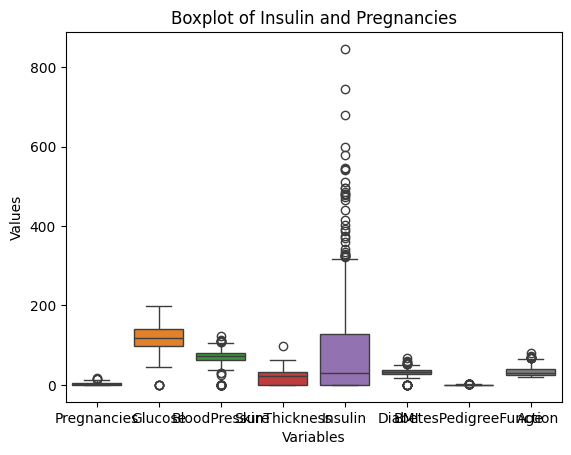

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง DataFrame จากข้อมูลที่ให้มา


# Plot กราฟด้วย seaborn
sns.boxplot(data=data[['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
plt.title('Boxplot of Insulin and Pregnancies')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

# รายชื่อคอลัมน์ที่ต้องการจัดการ Outliers
columns_to_winsorize = ['Pregnancies', 'Glucose', 'BloodPressure',
                        'SkinThickness', 'Insulin', 'BMI',
                        'DiabetesPedigreeFunction', 'Age']

# ใช้ loop เพื่อจัดการ Outliers ในแต่ละคอลัมน์
for column in columns_to_winsorize:
    data[column + '_win'] = winsorize(data[column], (0.1, 0.1))

# แสดง DataFrame หลังจากจัดการ Outliers แล้ว
print(data)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Pregnancies_win  Glucose_win  \
0                       0.627   50

#AFTER

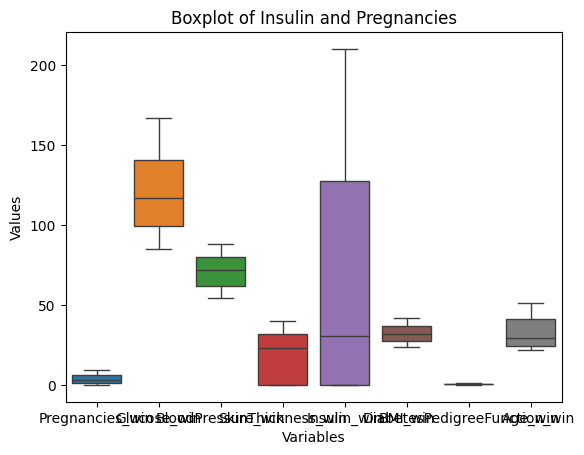

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง DataFrame จากข้อมูลที่ให้มา


# Plot กราฟด้วย seaborn
sns.boxplot(data=data[['Pregnancies_win', 'Glucose_win','BloodPressure_win','SkinThickness_win','Insulin_win','BMI_win','DiabetesPedigreeFunction_win','Age_win']])
plt.title('Boxplot of Insulin and Pregnancies')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

In [ ]:
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_win,Glucose_win,BloodPressure_win,SkinThickness_win,Insulin_win,BMI_win,DiabetesPedigreeFunction_win,Age_win
0,6,148,72,35,0,33.6,0.627,50,1,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31,0,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32,1,8,167,64,0,0,23.6,0.672,32
3,1,89,66,23,94,28.1,0.167,21,0,1,89,66,23,94,28.1,0.167,22
4,0,137,40,35,168,43.1,2.288,33,1,0,137,54,35,168,41.5,0.880,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,9,101,76,40,180,32.9,0.171,51
764,2,122,70,27,0,36.8,0.340,27,0,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30,0,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47,1,1,126,60,0,0,30.1,0.349,47


In [ ]:
data = data.drop(data.columns[:8], axis=1)

# แสดง DataFrame ใหม่หลังจากลบคอลัมน์
print(data)

     Outcome  Pregnancies_win  Glucose_win  BloodPressure_win  \
0          1                6          148                 72   
1          0                1           85                 66   
2          1                8          167                 64   
3          0                1           89                 66   
4          1                0          137                 54   
..       ...              ...          ...                ...   
763        0                9          101                 76   
764        0                2          122                 70   
765        0                5          121                 72   
766        1                1          126                 60   
767        0                1           93                 70   

     SkinThickness_win  Insulin_win  BMI_win  DiabetesPedigreeFunction_win  \
0                   35            0     33.6                         0.627   
1                   29            0     26.6                   

In [ ]:
# ดึงคอลัมน์ 'Outcome' ออกจาก DataFrame และเก็บไว้ในตัวแปร outcome_column
outcome_column = data.pop('Outcome')

# แทรกคอลัมน์ 'Outcome' ที่ตำแหน่งสุดท้ายของ DataFrame
data.insert(len(data.columns), 'Outcome', outcome_column)

# แสดง DataFrame ใหม่หลังจากเปลี่ยนแปลง
print(data)


     Pregnancies_win  Glucose_win  BloodPressure_win  SkinThickness_win  \
0                  6          148                 72                 35   
1                  1           85                 66                 29   
2                  8          167                 64                  0   
3                  1           89                 66                 23   
4                  0          137                 54                 35   
..               ...          ...                ...                ...   
763                9          101                 76                 40   
764                2          122                 70                 27   
765                5          121                 72                 23   
766                1          126                 60                  0   
767                1           93                 70                 31   

     Insulin_win  BMI_win  DiabetesPedigreeFunction_win  Age_win  Outcome  
0              0     33

In [ ]:
data

,Pregnancies_win,Glucose_win,BloodPressure_win,SkinThickness_win,Insulin_win,BMI_win,DiabetesPedigreeFunction_win,Age_win,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,167,64,0,0,23.6,0.672,32,1
3,1,89,66,23,94,28.1,0.167,22,0
4,0,137,54,35,168,41.5,0.880,33,1
...,...,...,...,...,...,...,...,...,...
763,9,101,76,40,180,32.9,0.171,51,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X = data.iloc[:,0:8].values
y = data.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)

In [ ]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 167.   ,  64.   , ...,  23.6  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
data.columns

Index(['Pregnancies_win', 'Glucose_win', 'BloodPressure_win',
       'SkinThickness_win', 'Insulin_win', 'BMI_win',
       'DiabetesPedigreeFunction_win', 'Age_win', 'Outcome'],
      dtype='object')

array([[<Axes: xlabel='Pregnancies_win', ylabel='Pregnancies_win'>,
        <Axes: xlabel='Glucose_win', ylabel='Pregnancies_win'>,
        <Axes: xlabel='BloodPressure_win', ylabel='Pregnancies_win'>,
        <Axes: xlabel='SkinThickness_win', ylabel='Pregnancies_win'>,
        <Axes: xlabel='Insulin_win', ylabel='Pregnancies_win'>,
        <Axes: xlabel='BMI_win', ylabel='Pregnancies_win'>,
        <Axes: xlabel='DiabetesPedigreeFunction_win', ylabel='Pregnancies_win'>,
        <Axes: xlabel='Age_win', ylabel='Pregnancies_win'>],
       [<Axes: xlabel='Pregnancies_win', ylabel='Glucose_win'>,
        <Axes: xlabel='Glucose_win', ylabel='Glucose_win'>,
        <Axes: xlabel='BloodPressure_win', ylabel='Glucose_win'>,
        <Axes: xlabel='SkinThickness_win', ylabel='Glucose_win'>,
        <Axes: xlabel='Insulin_win', ylabel='Glucose_win'>,
        <Axes: xlabel='BMI_win', ylabel='Glucose_win'>,
        <Axes: xlabel='DiabetesPedigreeFunction_win', ylabel='Glucose_win'>,
        <Axes

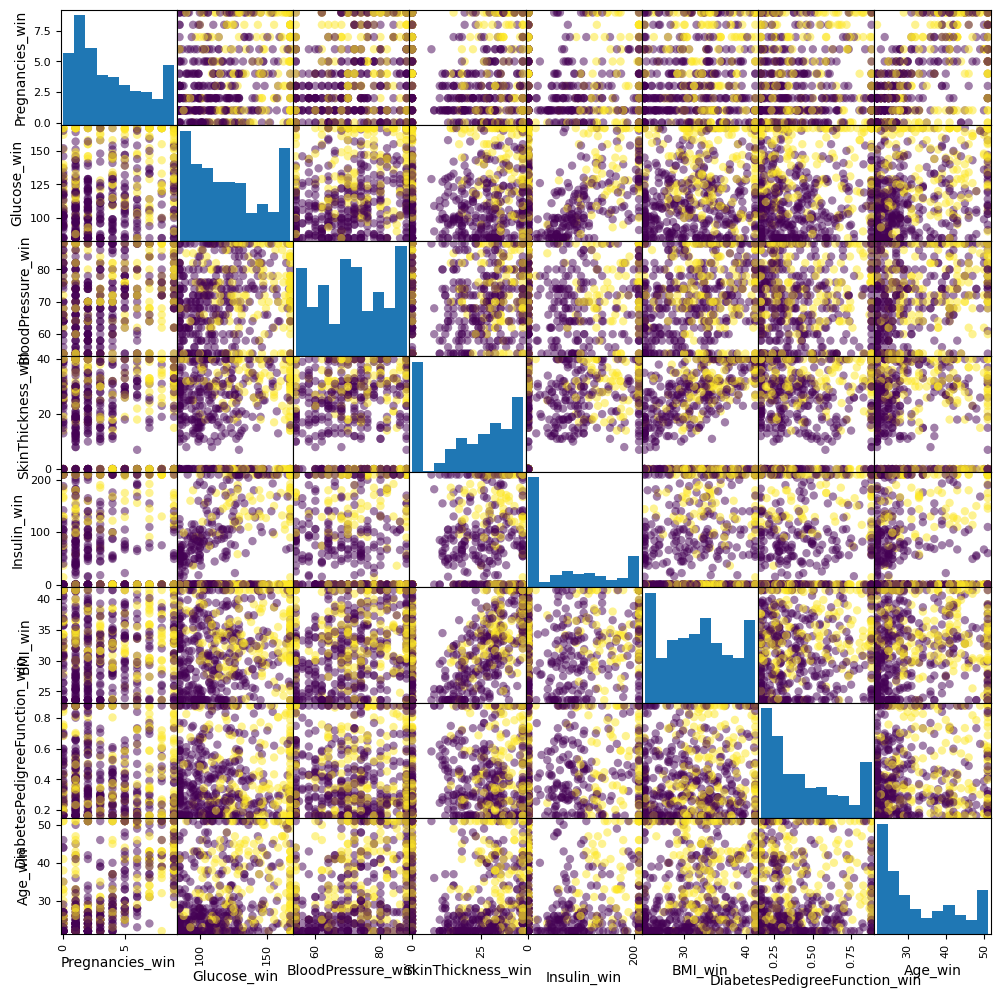

In [ ]:
# Plot the data
import pandas as pd
diabetes = pd.DataFrame(X_train, columns=data.columns[:8])
pd.plotting.scatter_matrix(diabetes, c=y_train, figsize=(12,12), marker="o") # o is marker on graph

In [ ]:
#https://scikit-learn.org/stable/modules/classes.html?highlight=neighbors#module-sklearn.neighbors
from sklearn import neighbors

#1

In [ ]:
# create the model
knn_model = neighbors.KNeighborsClassifier(n_neighbors=1)
# fit the model
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred= knn_model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=knn_model.predict(X_test)))

Train data accuracy: 1.0
Test data accuracy: 0.7142857142857143


#3

In [ ]:
# create the model
knn_model = neighbors.KNeighborsClassifier(n_neighbors=3)
# fit the model
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred= knn_model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=knn_model.predict(X_test)))

Train data accuracy: 0.8528864059590316
Test data accuracy: 0.7012987012987013


#5

In [ ]:
# create the model
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)
# fit the model
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred= knn_model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=knn_model.predict(X_test)))

Train data accuracy: 0.8119180633147114
Test data accuracy: 0.7142857142857143


#7

In [ ]:
# create the model
knn_model = neighbors.KNeighborsClassifier(n_neighbors=7)
# fit the model
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred= knn_model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=knn_model.predict(X_test)))

Train data accuracy: 0.8044692737430168
Test data accuracy: 0.696969696969697


#9 *Best

In [ ]:
# create the model
knn_model = neighbors.KNeighborsClassifier(n_neighbors=9)
# fit the model
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred= knn_model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=knn_model.predict(X_test)))

Train data accuracy: 0.7951582867783985
Test data accuracy: 0.7142857142857143


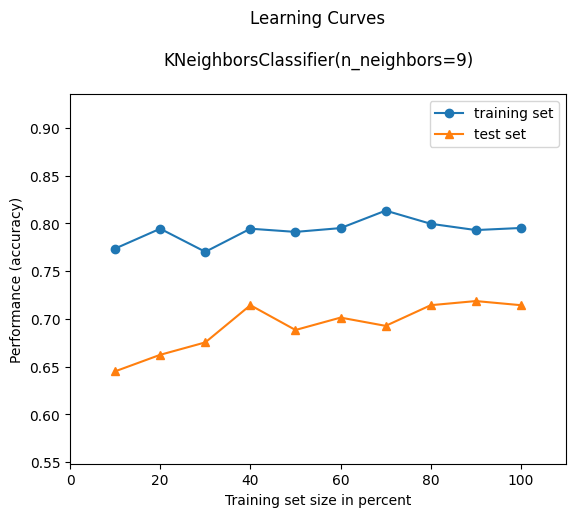

In [ ]:
#http://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
plot_learning_curves(X_train, y_train, X_test, y_test, knn_model,scoring='accuracy')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
y_pred = knn_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[122,  22],
       [ 44,  43]])

In [ ]:
#Measures of the predicted values
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       144
           1       0.66      0.49      0.57        87

    accuracy                           0.71       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.71      0.71      0.70       231



In [ ]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression  #https://forest-admin.forest.ku.ac.th/304xxx/?q=system/files/book/5%282018%29%20Logistic%20Regression.pdf
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  #https://www.solutioncenterminitab.com/blog/an-overview-of-discriminant-analysis/
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC #https://guopai.github.io/ml-blog08.html
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
kfold = model_selection.KFold(n_splits=10)

In [ ]:
models = []
models.append(('C4.5', DecisionTreeClassifier(criterion='entropy',max_depth=3)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('NB', GaussianNB()))

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

C4.5: 0.752096 (0.062286)
KNN: 0.722257 (0.062839)
NB: 0.744514 (0.059402)


In [ ]:
results

[array([0.74074074, 0.7962963 , 0.66666667, 0.85185185, 0.77777778,
        0.77777778, 0.77777778, 0.77358491, 0.62264151, 0.73584906]),
 array([0.66666667, 0.81481481, 0.7037037 , 0.7962963 , 0.77777778,
        0.72222222, 0.72222222, 0.66037736, 0.60377358, 0.75471698]),
 array([0.72222222, 0.77777778, 0.77777778, 0.75925926, 0.77777778,
        0.72222222, 0.87037037, 0.66037736, 0.66037736, 0.71698113])]

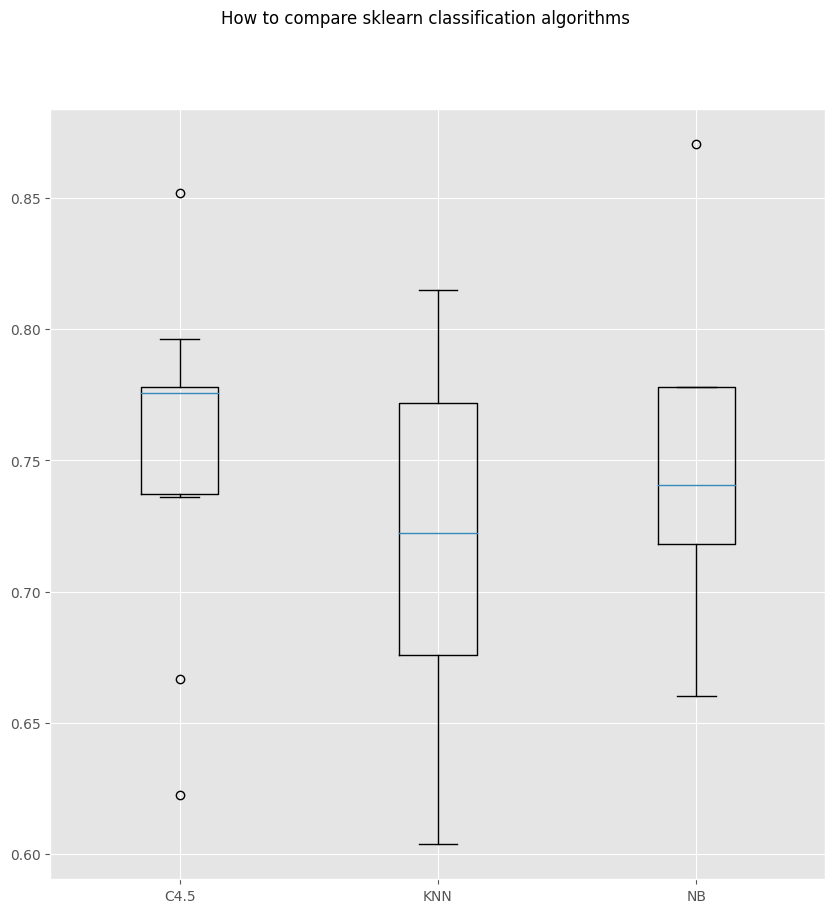

In [ ]:

fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
sum_results = np.mean(results, axis=1)

In [ ]:
sum_results

array([0.75209644, 0.72225716, 0.74451433])

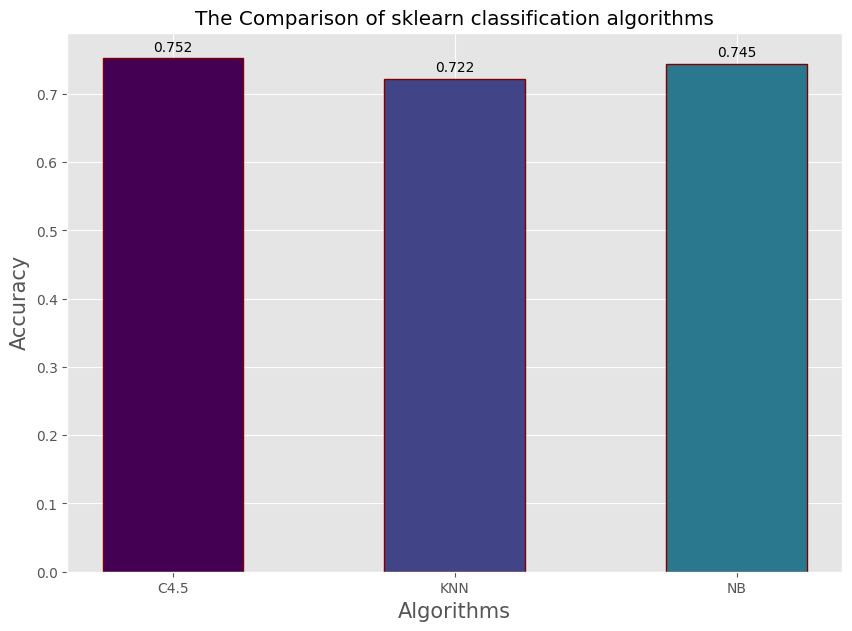

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10, 7))
col_map = plt.get_cmap('viridis',6)  #tab20  #plasma

per = plt.bar(names, sum_results, width = 0.5, color=col_map.colors,
        edgecolor='maroon', linewidth=1)

#The annotate() function in pyplot module of matplotlib library is used to annotate the point xy with text s.
#show label in bar plot
for p in per:
   height = p.get_height()
   #https://matplotlib.org/stable/tutorials/text/annotations.html
   plt.annotate('{:.3f}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')


plt.xlabel('Algorithms',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('The Comparison of sklearn classification algorithms')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier model
c45_model = DecisionTreeClassifier()

# Fit the model on the training data
c45_model.fit(X_train, y_train)

# Define the unseen data
X_unseen = [
    [6, 144, 70, 8, 30, 0.65, 55, 1],
    [6, 174, 75, 8, 60, 0.65, 50, 1],
    [6, 144, 50, 8, 40, 0.75, 55, 1]
]

# Predict using the C4.5 model
Y_pred = c45_model.predict(X_unseen)
print(Y_pred)


[1 0 1]
